In [4]:
import pickle
from sklearn import manifold
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
from keras.models import load_model

/anaconda3/envs/udacity_tensorflow_py3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/envs/udacity_tensorflow_py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [14]:
with open("X_all_train.pickle","rb") as f:
    (X_all_train, target_all) = pickle.load(f)
with open("X_test.pickle","rb") as f:
    X_test = pickle.load(f)

In [77]:
model = load_model("/Users/Robin/Desktop/udacity_ml/Rossman_store/robin/models/model_18/model0.h5")

In [78]:
weights = model.get_weights()

In [79]:
store_embedding = weights[0]
dow_embedding = weights[1]
month_embedding = weights[3]
day_embedding = weights[4]
german_states_embedding = weights[12]
promo_hasbeen_embedding = weights[9]
comp_hasbeen_embedding = weights[8]

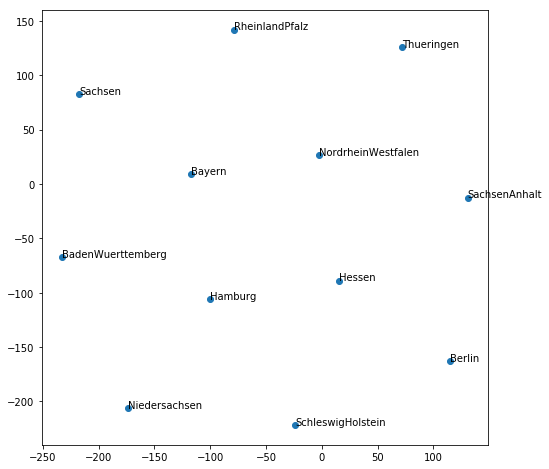

In [83]:
tsne = manifold.TSNE(init='pca', random_state=0, method='exact')
Y = tsne.fit_transform(german_states_embedding)
states_names = ['Niedersachsen', 'Hamburg', 'Thueringen', 'RheinlandPfalz', 'SachsenAnhalt', 'BadenWuerttemberg','Sachsen', 'Berlin', 'Hessen', 'SchleswigHolstein', 'Bayern', 'NordrheinWestfalen']
plt.figure(figsize=(8,8))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(states_names):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]))
plt.savefig('state_embedding.png')

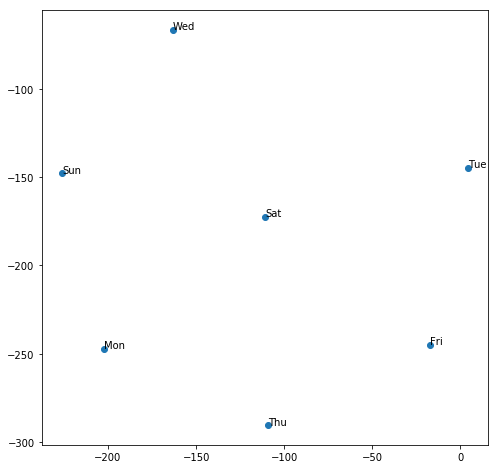

In [56]:
tsne = manifold.TSNE(init='pca', random_state=0, method='exact')
Y = tsne.fit_transform(dow_embedding)
names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
plt.figure(figsize=(8,8))
Yi = Y[1:,:]
plt.scatter(-Yi[:, 0], -Yi[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Yi[i, 0],-Yi[i, 1]))
plt.savefig('dow_embedding.png')

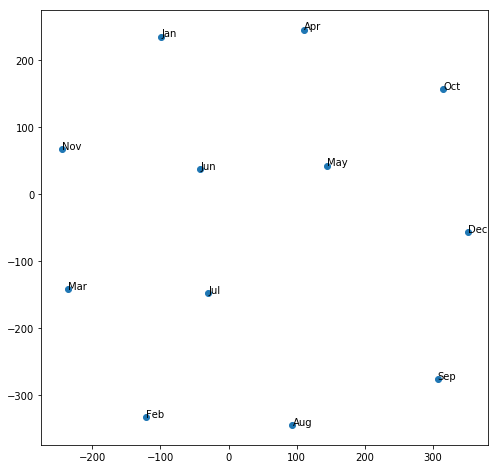

In [70]:
tsne = manifold.TSNE(init='pca', random_state=0, method='exact')
Y = tsne.fit_transform(month_embedding)
names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(8,8))
Yi = Y[1:,:]
plt.scatter(-Yi[:, 0], -Yi[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Yi[i, 0],-Yi[i, 1]))
plt.savefig('month_embedding.png')

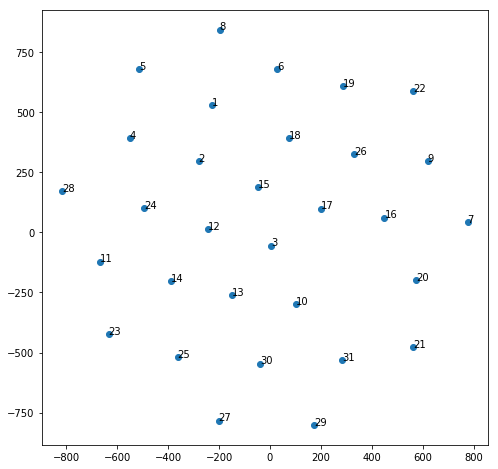

In [76]:
tsne = manifold.TSNE(init='pca', random_state=0, method='exact')
Y = tsne.fit_transform(day_embedding)
days = np.array(range(31))
names = []
for i in days:
    names.append(str(days[i]+1))
np.reshape(names,[1,-1])
plt.figure(figsize=(8,8))
Yi = Y[1:,:]
plt.scatter(-Yi[:, 0], -Yi[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Yi[i, 0],-Yi[i, 1]))
plt.savefig('day_embedding.png')

In [73]:
np.shape(comp_hasbeen_embedding)

(25, 2)

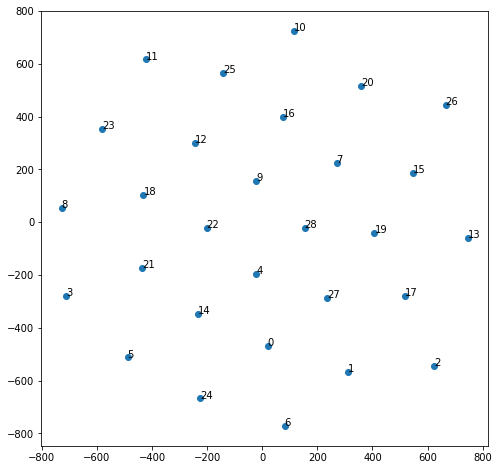

In [72]:
tsne = manifold.TSNE(init='pca', random_state=0, method='exact')
Y = tsne.fit_transform(promo_hasbeen_embedding)
promo = np.array(range(29))
names = []
for i in promo:
    names.append(str(promo[i]))
np.reshape(names,[1,-1])
plt.figure(figsize=(8,8))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]))
plt.savefig('promo_hasbeen_embedding.png')

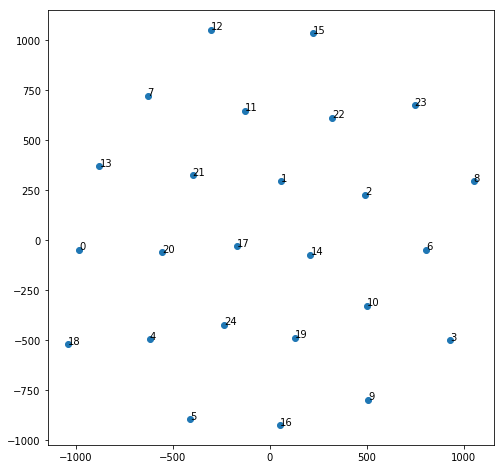

In [74]:
tsne = manifold.TSNE(init='pca', random_state=0, method='exact')
Y = tsne.fit_transform(comp_hasbeen_embedding)
comp = np.array(range(25))
names = []
for i in comp:
    names.append(str(comp[i]))
np.reshape(names,[1,-1])
plt.figure(figsize=(8,8))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]))
plt.savefig('comp_hasbeen_embedding.png')